In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import jarque_bera, ttest_1samp, ttest_ind, ncx2
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from datetime import date, datetime
import yahoo_fin.stock_info as si 
from yahoo_fin import options
import warnings
warnings.filterwarnings("ignore")

# M1

## L1

In [29]:
0.5 * (0.8**10) + (1-0.5) * (1.2**0)

0.5536870912

In [50]:
x = np.pi
f'{x:.2f}'

'3.14'

In [71]:
def binomial_call_full(S_ini, K, d, u, T, N, r=0):
    dt = T/N
    S = np.zeros(shape=(N+1,N+1))
    C = np.zeros(shape=(N+1,N+1))
    p = (np.exp(r*dt) - d) / (u-d)
    for i in range(N+1):
        C[N, i] = f'{max(S_ini * (u ** i) * (d ** (N-i)) - K, 0):.2f}'
        S[N, i] = f'{S_ini * (u ** i) * (d ** (N-i)):.2f}'        
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            C[j, i] = f'{np.exp(-r*dt) * (p * C[j+1, i+1] + (1-p) * C[j+1, i]):.2f}'
            S[j, i] = f'{S_ini * (d ** (j-i)) * (u ** (i)):.2f}'
    # print(S[:2], S[-2:], C[0:2], C[-2:], sep='\n\n')
    return C[0,0], C, S

binomial_call_full(100, 100, 0.8, 1.2, 10, 8)

(23.07,
 array([[ 23.07,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
           0.  ],
        [ 10.93,  35.22,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
           0.  ],
        [  3.98,  17.87,  52.56,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
           0.  ],
        [  0.85,   7.12,  28.62,  76.5 ,   0.  ,   0.  ,   0.  ,   0.  ,
           0.  ],
        [  0.  ,   1.71,  12.54,  44.71, 108.29,   0.  ,   0.  ,   0.  ,
           0.  ],
        [  0.  ,   0.  ,   3.42,  21.66,  67.77, 148.82,   0.  ,   0.  ,
           0.  ],
        [  0.  ,   0.  ,   0.  ,   6.85,  36.48,  99.06, 198.59,   0.  ,
           0.  ],
        [  0.  ,   0.  ,   0.  ,   0.  ,  13.7 ,  59.25, 138.88, 258.31,
           0.  ],
        [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,  27.4 ,  91.1 , 186.65,
         329.98]]),
 array([[100.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
           0.  ],
        [ 80.  , 120.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
       

## L2

In [72]:
def binomial_put_full(S_ini, K, d, u, T, N, r=0):
    dt = T/N
    S = np.zeros(shape=(N+1,N+1))
    P = np.zeros(shape=(N+1,N+1))
    p = (np.exp(r*dt) - d) / (u-d)
    for i in range(N+1):
        P[N, i] = f'{max(K - S_ini * (u ** i) * (d ** (N-i)), 0):.2f}'
        S[N, i] = f'{S_ini * (u ** i) * (d ** (N-i)):.2f}'        
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            P[j, i] = f'{np.exp(-r*dt) * (p * P[j+1, i+1] + (1-p) * P[j+1, i]):.2f}'
            S[j, i] = f'{S_ini * (d ** (j-i)) * (u ** (i)):.2f}'
    # print(S[:2,:10], S[-2:,:10], P[0:2,:10], P[-2:,:10], sep='\n\n')
    return P[0,0], P, S

put_price, P, S = binomial_put_full(36, 36, 0.7, 1.1, 50, 50, 0.01)

In [76]:
C0, C, S = binomial_call_full(100, 90, 0.8, 1.2, 1, 10, 0)
P0, P, S = binomial_put_full(100, 90, 0.8, 1.2, 1, 10, 0)

print('call price: ', C0)
print('put price: ', P0)

call price:  29.38
put price:  19.38


In [82]:
round(C0 + 90 * np.exp(0) - 100 - P0, 2)

-0.0

In [86]:
put_price, P, S = binomial_put_full(S_ini=100, K=90, u=1.2, d=0.8, r=0, N=2, T=1)
call_price, C, S = binomial_call_full(S_ini=100, K=90, u=1.2, d=0.8, r=0, N=2, T=1)

print(put_price)
print(call_price)

6.5
16.5


In [87]:
print(S)
print(C)
print(P)

[[100.   0.   0.]
 [ 80. 120.   0.]
 [ 64.  96. 144.]]
[[16.5  0.   0. ]
 [ 3.  30.   0. ]
 [ 0.   6.  54. ]]
[[ 6.5  0.   0. ]
 [13.   0.   0. ]
 [26.   0.   0. ]]


In [90]:
np.full(C.shape,100)

array([[100, 100, 100],
       [100, 100, 100],
       [100, 100, 100]])

In [93]:
C + np.full(C.shape, 90) - S - P

array([[ 0., 90., 90.],
       [ 0.,  0., 90.],
       [ 0.,  0.,  0.]])

## L3

In [84]:
def binomial_call_full(S_ini, K, d, u, T, N, r=0):
    dt = T/N
    S = np.zeros(shape=(N+1,N+1))
    C = np.zeros(shape=(N+1,N+1))
    delta = np.zeros(shape=(N,N))
    p = (np.exp(r*dt) - d) / (u-d)
    for i in range(N+1):
        C[N,i] = max(S_ini * (u ** i) * (d ** (N-i)) - K, 0)
        S[N,i] = S_ini * (u ** i) * (d ** (N-i))        
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            C[j,i] = np.exp(-r*dt) * (p * C[j+1, i+1] + (1-p) * C[j+1, i])
            S[j,i] = S_ini * (d ** (j-i)) * (u ** (i))
            delta[j,i] = (C[j+1, i+1] - C[j+1,i]) / (S[j+1,i+1]-S[j+1,i])
    return C[0,0], C, S, delta

In [161]:
call_price, C, S, delta = binomial_call_full(S_ini=100, K=90, u=1.2, d=0.8, r=0, N=1000, T=1)

C:\Users\huynh.th\AppData\Local\Temp\ipykernel_21648\3041049596.py:14: RuntimeWarning: invalid value encountered in scalar divide
  delta[j,i] = (C[j+1, i+1] - C[j+1,i]) / (S[j+1,i+1]-S[j+1,i])
C:\Users\huynh.th\AppData\Local\Temp\ipykernel_21648\3041049596.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  delta[j,i] = (C[j+1, i+1] - C[j+1,i]) / (S[j+1,i+1]-S[j+1,i])


In [162]:
C[-1][C[-1]>0][-1]

1.5179100891722457e+81

In [164]:
S[-1][S[-1]>0][-1]-C[-1][C[-1]>0][-1]

0.0

In [168]:
delta[-1][delta[-1]>0].shape

(450,)

## L4

In [35]:
def binomial_call_full(S_ini, K, sigma, T, N, r=0):
    dt = T/N # define time step
    u = np.exp(sigma * np.sqrt(dt)) # define u
    d = np.exp(-sigma * np.sqrt(dt)) # define d
    S = np.zeros(shape=(N+1,N+1)) # underlying price
    C = np.zeros(shape=(N+1,N+1)) # call price
    delta = np.zeros(shape=(N,N)) # delta
    p = (np.exp(r*dt) - d) / (u-d) # risk neutral
    for i in range(N+1):
        C[N,i] = max(S_ini * (u ** i) * (d ** (N-i)) - K, 0)
        S[N,i] = S_ini * (u ** i) * (d ** (N-i))
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            C[j,i] = np.exp(-r*dt) * (p * C[j+1, i+1] + (1-p) * C[j+1, i])
            S[j,i] = S_ini * (d ** (j-i)) * (u ** (i))
            delta[j,i] = (C[j+1, i+1] - C[j+1,i]) / (S[j+1,i+1]-S[j+1,i])
    return C[0,0], C, S, delta

In [200]:
call_price, C, S, delta = binomial_call_full(100, 90, 0.3, 1, 1000)

In [208]:
price = []
for i in range(1, 2001, 100):
    call_price, C, S, delta = binomial_call_full(100, 90, 0.3, 1, i)
    price.append(f'{call_price:.2f}')

In [209]:
price

['19.14',
 '17.03',
 '17.00',
 '17.02',
 '17.01',
 '17.02',
 '17.01',
 '17.01',
 '17.02',
 '17.01',
 '17.01',
 '17.01',
 '17.01',
 '17.01',
 '17.01',
 '17.01',
 '17.01',
 '17.01',
 '17.01',
 '17.01']

# M2

## L1

In [2]:
def american_option(S_ini, K, T, r, u, d, N, opttype):
    dt = T/N # define dt
    C = np.zeros([N+1,N+1])
    S = np.zeros([N+1,N+1])
    p = (np.exp(r*dt)-d)/(u-d)

    for i in range(N+1):
        S[N, i] = S_ini * (u ** i * d ** (N-i))
        if opttype == "C":
            C[N, i] = max(S_ini * (u ** i * d ** (N-i)) - K, 0)
        else:
            C[N, i] = max(-S_ini * (u ** i * d ** (N-i)) + K, 0)

    for j in range(N-1, -1, -1):
        for i in range(j+1):
            C[j, i] = np.exp(-r*dt) * (p * C[j+1,i+1] + (1-p) * C[j+1,i])
            S[j, i] = S_ini * (u ** i * d ** (j-i))
            if opttype == "C":
                C[j, i] = max(C[j,i], S[j,i]-K)
            else:
                C[j, i] = max(C[j,i], -S[j,i]+K)
            
    return C[0,0], S, C

optionprice, S, C = american_option(145, 100, 100, 0.1, 1.2, 0.8, 100, "P")

In [3]:
optionprice

0.662571812972355

In [5]:
def american_option_sigma(S_ini, K, sigma, T, N, r, opttype):
    dt = T/N # define dt
    C = np.zeros([N+1,N+1])
    S = np.zeros([N+1,N+1])
    u = np.exp(sigma*np.sqrt(dt))
    d = np.exp(-sigma*np.sqrt(dt))
    p = (np.exp(r*dt)-d)/(u-d)

    for i in range(N+1):
        S[N, i] = S_ini * (u ** i * d ** (N-i))
        if opttype == "C":
            C[N, i] = max(S_ini * (u ** i * d ** (N-i)) - K, 0)
        else:
            C[N, i] = max(-S_ini * (u ** i * d ** (N-i)) + K, 0)

    for j in range(N-1, -1, -1):
        for i in range(j+1):
            C[j, i] = np.exp(-r*dt) * (p * C[j+1,i+1] + (1-p) * C[j+1,i])
            S[j, i] = S_ini * (u ** i * d ** (j-i))
            if opttype == "C":
                C[j, i] = max(C[j,i], S[j,i]-K)
            else:
                C[j, i] = max(C[j,i], -S[j,i]+K)
            
    return C[0,0], S, C

optionprice, S, C = american_option_sigma(100, 90, 0.3, 10, 10, 0, "C")

In [6]:
optionprice

39.899240766330934

In [106]:
S

array([[50.        ,  0.        ,  0.        ],
       [37.04091103, 67.49294038,  0.        ],
       [27.4405818 , 50.        , 91.10594002]])

In [107]:
C

array([[ 7.4284019 ,  0.        ,  0.        ],
       [14.95908897,  0.93269783,  0.        ],
       [24.5594182 ,  2.        ,  0.        ]])

In [111]:
option_price, C, S = american_option(145, 100, 1.2, 0.8, 100, 100, 0, 'P')

In [112]:
option_price

62.58180350380169

## L2

In [100]:
def american_option_delta(S0, K, T, r, u, d, N, opttype='C'):
    dt = T/N
    S = np.zeros([N+1,N+1])
    C = np.zeros([N+1,N+1])
    p = (np.exp(r*dt)-d)/(u-d)
    delta = np.zeros([N,N])
    
    for i in range(N+1):
        S[N,i] = S0 * (u ** i) * (d ** (N-i))
        if opttype == 'C':
            C[N,i] = max(S[N,i] - K, 0)
        else:
            C[N,i] = max(-S[N,i] + K, 0)
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            S[j,i] = S0  * (u ** i) * (d ** (j-i))
            C[j,i] = np.exp(-r*dt) * (p * C[j+1,i+1] + (1-p) * C[j+1,i])
            if opttype == 'C':
                C[j,i] = max(C[j,i], S[j,i]-K)
            else:
                C[j,i] = max(C[j,i], -S[j,i]+K)

            delta[j,i] = (C[j+1,i+1]-C[j+1,i])/(S[j+1,i+1]-S[j+1,i])

    return C[0,0], S, C, delta

In [95]:
def european_option_delta(S0, K, T, r, u, d, N, opttype='C'):
    dt = T/N
    S = np.zeros([N+1,N+1])
    C = np.zeros([N+1,N+1])
    p = (np.exp(r*dt)-d)/(u-d)
    delta = np.zeros([N,N])
    
    for i in range(N+1):
        S[N,i] = S0 * (u ** i) * (d ** (N-i))
        if opttype == 'C':
            C[N,i] = max(S[N,i] - K, 0)
        else:
            C[N,i] = max(-S[N,i] + K, 0)
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            S[j,i] = S0  * (u ** i) * (d ** (j-i))
            C[j,i] = np.exp(-r*dt) * (p * C[j+1,i+1] + (1-p) * C[j+1,i])

            delta[j,i] = (C[j+1,i+1]-C[j+1,i])/(S[j+1,i+1]-S[j+1,i])

    return C[0,0], S, C, delta

In [108]:
USprice, USS, USC, USdelta = american_option_delta(50, 52, 5, 0.05, 1.2, 0.8, 5, 'P')
call_price, S, C, delta = european_option_delta(50, 52, 5, 0.05, 1.2, 0.8, 5, 'P')


In [111]:
print(USC,C, sep='\n\n')

[[ 5.78969979  0.          0.          0.          0.          0.        ]
 [12.          2.58633318  0.          0.          0.          0.        ]
 [20.          6.06131284  0.74056474  0.          0.          0.        ]
 [26.4        13.6         2.09383458  0.          0.          0.        ]
 [31.52       21.28        5.92        0.          0.          0.        ]
 [35.616      27.424      15.136       0.          0.          0.        ]]

[[ 3.87047533  0.          0.          0.          0.          0.        ]
 [ 7.51388712  2.02982099  0.          0.          0.          0.        ]
 [13.46003388  4.60760062  0.6696889   0.          0.          0.        ]
 [21.45154574  9.82840043  1.8934439   0.          0.          0.        ]
 [28.98393007 18.74393007  5.35342571  0.          0.          0.        ]
 [35.616      27.424      15.136       0.          0.          0.        ]]


In [113]:
print(USdelta,delta, sep='\n\n')

[[-0.47068334  0.          0.          0.          0.        ]
 [-0.87116795 -0.22169784  0.          0.          0.        ]
 [-1.         -0.59927945 -0.07270259  0.          0.        ]
 [-1.         -1.         -0.25694444  0.          0.        ]
 [-1.         -1.         -0.82118056  0.          0.        ]]

[[-0.27420331  0.          0.          0.          0.        ]
 [-0.55327708 -0.16407966  0.          0.          0.        ]
 [-0.90805823 -0.41327899 -0.06574458  0.          0.        ]
 [-1.         -0.87177763 -0.23235355  0.          0.        ]
 [-1.         -1.         -0.82118056  0.          0.        ]]


## L4

In [107]:
def call_option_mc(S0 ,K, T, r, sigma, N, M):
    dt = T/N
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    p = (np.exp(r*dt) - d)/(u-d)
    C = np.zeros([M])
    S = np.zeros([M, N+1])
    S[:, 0] = S0

    for j in range(0, M):
        random = np.random.binomial(
            1, p, N+1
        )
        for i in range(1,N+1):
            if random[i] == 1:
                S[j,i] = S[j, i-1]*u
            else:
                S[j,i] = S[j, i-1]*d
        
        C[j] = np.exp(-r * T) * max(S[j, N] - K, 0)
    return S, C

S, C = call_option_mc(100, 90, 1, 0, 0.3, 2500, 15000)
C.mean()

16.87338112892792

In [108]:
import matplotlib.pyplot as plt
price = []
M = np.arange(1000,15000,1000)
for i in range(len(M)):
    S, C = call_option_mc(100, 90, 1, 0, 0.3, 2500, M[i])
    price.append(np.mean(C))


KeyboardInterrupt: 

(14.0, 23.0)

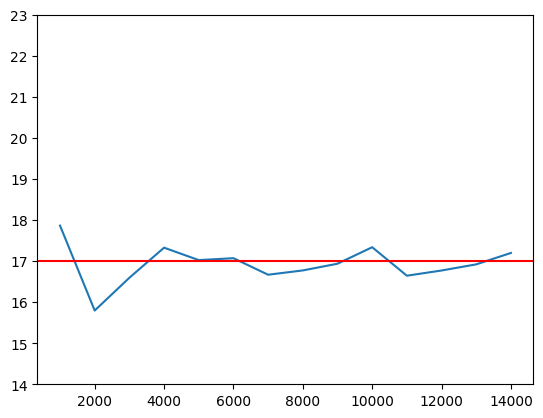

In [139]:
plt.plot(M, price)
plt.axhline(y=17.01, color='red')
plt.ylim([14,23])

# M1 + M2

In [19]:
sigma=0.2
r=0.05
dt=0.1
u = np.exp(sigma*np.sqrt(dt))
d = np.exp(-sigma*np.sqrt(dt))
p=(np.exp(r*dt)-d)/(u-d)
1-p

0.47620506908959126

In [3]:
# option price
def option_pricing_binary_tree(
    S0=100, K=90, u=1.2, d=0.8, sigma=0, T=2, N=2, r=0, opttype='C', opt='American', M=10
    ):
    dt = T/N # define dt
    if sigma > 0:
        u = np.exp(sigma*np.sqrt(dt))
        d = np.exp(-sigma*np.sqrt(dt))
    S = np.zeros([N+1,N+1])
    C = np.zeros([N+1,N+1])
    delta = np.zeros([N,N])
    p = (np.exp(r*dt)-d)/(u-d)
    # print(p)

    if opt=='European':
        for i in range(N+1):
            S[N,i] = S0*(u**i)*(d**(N-i))
            if opttype=='C':
                C[N,i] = max(S[N,i]-K,0)
            elif opttype=='P':
                C[N,i] = max(K-S[N,i],0)
        for j in range(N-1, -1, -1):
            for i in range(j+1):
                S[j,i] = S0*(u**i)*(d**(j-i))
                C[j,i] = np.exp(-r*dt)*(p*C[j+1,i+1] + (1-p)*C[j+1,i])
                delta[j,i] = (C[j+1,i+1]-C[j+1,i])/(S[j+1,i+1]-S[j+1,i])    

    elif opt=='American':
        for i in range(N+1):
            S[N,i] = S0*(u**i)*(d**(N-i))
            if opttype=='C':
                C[N,i] = max(S[N,i]-K,0)
            elif opttype=='P':
                C[N,i] = max(K-S[N,i],0)
        for j in range(N-1, -1, -1):
            for i in range(j+1):
                S[j,i] = S0*(u**i)*(d**(j-i))
                C[j,i] = np.exp(-r*dt)*(p*C[j+1,i+1] + (1-p)*C[j+1,i])
                if opttype=='C':
                    C[j,i] = max(S[j,i]-K,C[j,i])
                elif opttype=='P':
                    C[j,i] = max(K-S[j,i],C[j,i])
                delta[j,i] = (C[j+1,i+1]-C[j+1,i])/(S[j+1,i+1]-S[j+1,i])
    
    elif opt=='MC':
        S = np.zeros([M,N+1])
        C = np.zeros([M])
        S[:, 0]=S0
        for j in range(M):
            random = np.random.binomial(1,p,N+1)

            for i in range(1, N+1):
                if random[i]==1:
                    S[j,i] = S[j,i-1]*u
                else:
                    S[j,i] = S[j,i-1]*d
            
            C[j] = np.exp(-r*T)*max(S[j,N]-K,0)

    return C, S, delta

In [5]:
# Put-Call Parity
def P_C_Parity(S0=0, K=0, price=0, r=0, T=1, opttype='C'):
    if opttype=='C':
        price=price+K*np.exp(-r*T)-S0
    else:
        price=S0+price-K*np.exp(-r*T)
    return price

In [8]:
C, S_C, delta_call = option_pricing_binary_tree(S0=180, 
                                         K=182, 
                                        #  u=1.2,
                                        #  d=0.8,
                                         sigma=0.25,
                                         r=0.02, 
                                         T=6/12, 
                                         N=25, 
                                         opttype='P', 
                                         opt='American', 
                                         M=15000)
C[0,0]

13.03571894719869

In [10]:
P, S_P, delta_put = option_pricing_binary_tree(S0=100, 
                                         K=100, 
                                        #  u=1.2,
                                        #  d=0.8,
                                         sigma=0.2,
                                         r=0.05, 
                                         T=3/12, 
                                         N=50, 
                                         opttype='P', 
                                         opt='American', 
                                         M=15000)


In [11]:
print(delta_call[0,0])
print(delta_put[0,0])

0.56911969908816
-0.45026215338656067


In [43]:
def cf(S, C, delta, N=S.shape[0], path=np.array([1,-1,1,1])):
    path1=path.cumsum()
    path1[0]=0
    deltapadded=np.pad(delta, ((0,1),(0,1)))

    s=np.zeros([N])
    c=np.zeros([N])
    array_delta=np.zeros([N])
    value=np.zeros([N])
    cf=np.zeros([N])

    for i,j in zip(range(1,S.shape[0]+1),path1):
        s[i-1]=S[i-1,j]
        c[i-1]=C[i-1,j]
        array_delta[i-1]=deltapadded[i-1,j]
        cf[i-1]=(-array_delta[i-1]+array_delta[i-2])*s[i-1]
    cf[-1]=cf[-1]-c[-1]
    
    return cf

cf(S, C, delta)

array([ 57.5,  27.5,  -5.2, -99.6])

In [45]:
def payoff(K):
    n1=K-1
    n2=K+1
    for S in range(n1,n2):
        if S >= K:
            C=10-(S-K)
            P=3
        if S < K:
            C=10
            P=3-(S-K)
        S=-70+S
        B=64-K
        print(C,P,S,B)
        payoff = C+P+S+B
        # if payoff < 0:
        print(payoff)
    
payoff(K=60)


10 4 -11 4
7
10 3 -10 4
7


In [152]:
def asian_put_binomial_tree(S0, K, T, r, sigma, N):
  #create a matrix to hold the stock prices
    stock_price = np.zeros((N+1, N+1))
    dt = T/N
    # u = np.exp(sigma * np.sqrt(dt))
    u=1.2
    d=0.8
    # d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

  # Initialize the first column with the initial stock price
    stock_price[0, 0] = S0

    # Populate the stock price tree
    for i in range(1, N+1):
        stock_price[i, 0] = stock_price[i-1, 0] * u
        for j in range(1, i+1):
            stock_price[i, j] = stock_price[i-1, j-1] * d

    # Create a matrix to hold the option values
    option_value = np.zeros((N+1, N+1))
    avg_price = np.zeros((N+1, N+1))
    delta = np.zeros((N+1, N+1))

    # Calculate the option value at maturity
    for j in range(N+1):
        avg_price[N, j] = (S0 * (N - j) + stock_price[N, j] * (j + 1)) / (N + 1)
        option_value[N, j] = max(K - avg_price[N, j], 0)

    # Backward induction to determine the option value at each node
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            avg_price[i, j] = (S0 * (i - j) + stock_price[i, j] * (j + 1)) / (j + 1)
            option_value[i, j] = np.exp(-r * dt) * (p * option_value[i+1, j] + (1-p) * option_value[i+1, j+1])

            # Calculate delta
            delta[i, j] = (option_value[i+1, j] - option_value[i+1, j+1]) / (stock_price[i+1, j] - stock_price[i+1, j+1])

    return option_value, avg_price, delta

option_value, avg_price, delta = asian_put_binomial_tree(S0=100, K=90, T=1, r=0.02, sigma=0.25, N=3)

avg_price

array([[100. ,   0. ,   0. ,   0. ],
       [220. ,  80. ,   0. ,   0. ],
       [344. , 146. ,  64. ,   0. ],
       [118.2, 107.6,  82.6,  51.2]])

In [194]:
N=3
# vec = np.zeros((2**N))
# for i in range(2**N):
def vec(N):
    """
    array shape 2**N should repeat number of elements 2**i times
    """
    vec = np.zeros((2**N))
    for j in range(N):
        for i in range(2**N):
            vec[i] = i%2
        
    return vec

vec(N)
    

array([0., 1., 0., 1., 0., 1., 0., 1.])

In [225]:
N=3
u=1.2
d=0.8
vec_up = np.zeros([N,2**N])
for j in range(N):
    for i in range(2**j):
        vec_up[j,i] = u
vec_up

vec_down = np.zeros([N,2**N])
for j in range(N):
    for i in range(-2**j,0,1):
        vec_down[j,i] = d
vec_down

np.concatenate((vec_down[:,4:],vec_up[:,:4]), axis=1)

array([[0. , 0. , 0. , 0.8, 1.2, 0. , 0. , 0. ],
       [0. , 0. , 0.8, 0.8, 1.2, 1.2, 0. , 0. ],
       [0.8, 0.8, 0.8, 0.8, 1.2, 1.2, 1.2, 1.2]])

In [227]:
N=3
u=1.2
d=0.8
vec_up = np.zeros([N,2**N])
for j in range(N):
    for i in range(2**j):
        vec_up[j,i] = u
        vec_up[j,-i-1] = d

vec_up

array([[1.2, 0. , 0. , 0. , 0. , 0. , 0. , 0.8],
       [1.2, 1.2, 0. , 0. , 0. , 0. , 0.8, 0.8],
       [1.2, 1.2, 1.2, 1.2, 0.8, 0.8, 0.8, 0.8]])

In [298]:
def asian(S0, K, N, u, d, r, T):
    dt = T / N
    # u = np.exp(sigma * np.sqrt(dt))
    # d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    
    stock=np.zeros((N,2**N))
    vec_up = np.zeros([2**N])

    for j in range(1,N):
        vec_up = np.zeros([2**j])
        for i in range(2**(j+1)//2):
            vec_up[i]=u
            vec_up[-i-1]=d
        vec_up = np.tile(vec_up, 2**(N-j))
        stock[N-j]=vec_up

    for i in range(2**N):
        if i <= 2**N//2-1:
            stock[0,i]=d
        else:
            stock[0,i]=u

    stock = np.cumprod(stock, axis=0)*100
    stock = np.cumsum(stock, axis=0)+100

    for i in range(0,N):
        stock[i]=stock[i]/(i+2)

    payoff = np.maximum(0, stock-K)

    return stock,payoff


asian(S0=100, K=90, N=2, u=1.2, d=0.8, r=0, T=1)

(array([[ 90.        ,  90.        , 110.        , 110.        ],
        [ 81.33333333,  92.        , 105.33333333, 121.33333333]]),
 array([[ 0.        ,  0.        , 20.        , 20.        ],
        [ 0.        ,  2.        , 15.33333333, 31.33333333]]))

In [296]:
N=3
u=1.2
d=0.8
stock=np.zeros((N,2**N))
vec_up = np.zeros([2**N])

for j in range(1,N):
    vec_up = np.zeros([2**j])
    for i in range(2**(j+1)//2):
        vec_up[i]=u
        vec_up[-i-1]=d
    vec_up = np.tile(vec_up, 2**(N-j))
    stock[N-j]=vec_up

for i in range(2**N):
    if i <= 2**N//2-1:
        stock[0,i]=d
    else:
        stock[0,i]=u

stock = np.cumprod(stock, axis=0)*100
stock = np.cumsum(stock, axis=0)+100

for i in range(0,N):
    stock[i]=stock[i]/(i+2)

stock

for i in range(-N, -1, 1):
    print(stock[i])

TypeError: 'numpy.float64' object is not callable

In [128]:
u=1.2
d=0.8
N=3
S0=100
stock = np.zeros([N+1,2**N])
stock[0,0] = S0
for i in range(1,N+1):
    for j in range(2**N-2,-1,-1):
        stock[i,j] = S0*u**(j)*d**(i-j)
        if j % 2 == 1:
            stock[i,j+1] = S0*u**(j)*d**(i-j)
stock[-1,-1] = S0*u**(N)
stock

# avg_price = np.zeros([N+1,2**N])
# avg_price_asian = np.zeros([N+1,2**N])
# avg_price[0,0] = S0
# avg_price_asian[0,0] = S0
# for i in range(1,N+1):
        
#     for j in range(i+1):
#         print(j)
#         avg = avg_price[i-1,j]
#         avg_price[i,j] = (avg+stock[i,j])
#         avg_price_asian[i,j] = avg_price[i,j]/(i+1)
#         print(avg_price)
#         # print(avg_price_asian)

# avg_price[2,0]/3

array([[100. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
       [ 80. , 120. , 120. , 270. , 270. , 607.5, 607.5,   0. ],
       [ 64. ,  96. ,  96. , 216. , 216. , 486. , 486. ,   0. ],
       [ 51.2,  76.8,  76.8, 172.8, 172.8, 388.8, 388.8, 172.8]])

# M3

* Arbitrage free  
$p_u+p_d+p_m=1$  
$S_0=e^{-rdt}(p_u*S_u+p_m*S_m+p_d*S_d)$

* Matching Var:  
$E(Var(S_{t+1}|K))=Var(S_t)$  
$u=\frac{1}{d}$    $m=1$    
$u=e^{\sigma\sqrt{2dt}}$  
$d=e^{-\sigma\sqrt{2dt}}$  
$p_u=(\frac{e^{r\frac{dt}{2}}-e^{-\sigma\sqrt{\frac{dt}{2}}}}{e^{\sigma\sqrt{\frac{dt}{2}}}-e^{-\sigma\sqrt{\frac{dt}{2}}}})^2$  
$p_d=(\frac{-e^{r\frac{dt}{2}}+e^{\sigma\sqrt{\frac{dt}{2}}}}{e^{\sigma\sqrt{\frac{dt}{2}}}-e^{-\sigma\sqrt{\frac{dt}{2}}}})^2$  
$p_m=1-p_u-p_d$

In [183]:
class TrinomialOptions:
    def __init__(self, S0, sigma, r, T, strike_price=None):
        self.S0 = S0
        self.sigma = sigma
        self.r = r
        self.T = T
        self.K = strike_price
    
    def _compute_probs(self, h):      
        self.pu = (
            (
                np.exp(self.r*h/2) - np.exp(-self.sigma*np.sqrt(h/2))
                )/
            (
                np.exp(self.sigma*np.sqrt(h/2))-np.exp(-self.sigma*np.sqrt(h/2))
                )
            )**2
        self.pd = (
            (
                -np.exp(self.r*h/2) + np.exp(self.sigma*np.sqrt(h/2))
                )/
            (
                np.exp(self.sigma*np.sqrt(h/2))-np.exp(-self.sigma*np.sqrt(h/2))
                )
            )**2
        self.pm = 1-self.pu-self.pd

        # print(self.pu, self.pd, self.pm)

    def _vec_stock_price(self, h, nb):
        up = np.exp(self.sigma*np.sqrt(2*h))
        down = 1/up
        vec_u = up * np.ones(nb)
        np.cumprod(vec_u, out=vec_u)
        vec_d = down * np.ones(nb)
        np.cumprod(vec_d, out=vec_d)
        res = np.concatenate((vec_d[::-1],[1.0],vec_u))
        return res*self.S0

    def _payoff(self, stock_vec, opttype):
        if opttype == 'call':
            return np.maximum(stock_vec - self.K, 0.0)
        elif opttype == 'put':
            return np.maximum(self.K - stock_vec, 0.0)
        else:
            raise ValueError('opttype must be call or put')

    def _current_option_price(self, current_vec, nxt_vec, opt=None, opttype=None):
        expectation = np.zeros(current_vec.size)

        for i in range(current_vec.size):
            tmp = nxt_vec[i] * self.pd
            tmp += nxt_vec[i+1] * self.pm
            tmp += nxt_vec[i+2] * self.pu

            expectation[i] = tmp

        discounted_expectations = expectation * self.discount

        if opt==True:
            exersice_value = self._payoff(current_vec, opttype)
            return np.maximum(discounted_expectations, exersice_value)
        else:
            return discounted_expectations


    def price(self, nb, opt=None, opttype=None):
        h = self.T/nb
        self._compute_probs(h)
        self.discount = np.exp(-self.r*h)
        final_vec = self._vec_stock_price(h, nb)
        final_payoff = self._payoff(stock_vec=final_vec, opttype=None)
        print(final_payoff)
        nxt_vec = final_payoff
        for i in range(1, nb+1):
            current_vec = self._vec_stock_price(h, nb-i)
            nxt_vec = self._current_option_price(current_vec, nxt_vec, opt, opttype)
        
        return nxt_vec[0]           
        

# K = [100*i for i in np.arange(0,1.2,0.1)]
# AC2 = []
# EC2 = []
# for k in K:
#     American_Call = TrinomialOptions(S0=100.0, r=0.05, sigma=0.2, T=3/12, strike_price=k).price(5, opttype='put', opt=True)
#     European_Call = TrinomialOptions(S0=100.0, r=0.05, sigma=0.2, T=3/12, strike_price=k).price(5, opttype='put', opt=False)
#     AC2.append(American_Call)
#     EC2.append(European_Call)

In [184]:
TrinomialOptions(S0=100.0, r=0.05, sigma=0.2, T=3/12, strike_price=100).price(3, opttype='call', opt=True)

ValueError: opttype must be call or put

In [182]:
TrinomialModel(S0=100.0, r=0.05, sigma=0.2, T=3/12).price(3, strike_price=100, option_type='put', is_american=True)

[21.72555227 15.06630699  7.84052246  0.          0.          0.
  0.        ]


3.3035341563892002

In [150]:
EC2

[98.5111221243042,
 88.63534411936541,
 78.75956611442658,
 68.8837881094878,
 59.008010104548994,
 49.13223209961039,
 39.256454234316,
 29.38102369977272,
 19.545839703335947,
 10.367317407975252,
 3.8013822883159922,
 0.8989774179585568]

In [51]:
# trinomial
def _gen_stock_vec(n,u=0,d=0,sigma=0,N=3,T=1):   
    dt=T/N # fixed nb
    if sigma!=0:
        u=np.exp(sigma*np.sqrt(2*dt))
        d=np.exp(-sigma*np.sqrt(2*dt))
        
    vec_u=u*np.ones(n)
    np.cumprod(vec_u, out=vec_u) # u, u^2, u^3 ...

    vec_d=d*np.ones(n)
    np.cumprod(vec_d, out=vec_d) # u, u^2, u^3 ...

    # print(vec_u, vec_d)
    
    res=np.concatenate(
        (vec_d[::-1], [1.0], vec_u)
    )
    return res

In [193]:
def optionprice(S0=100,K=130,n=1,u=1.2,d=1/1.2,sigma=0.5,r=0,N=3,T=1,opttype='C',opt='European'):
    dt=T/N
    n=N
    pu=((np.exp(r*dt/2)-np.exp(-sigma*np.sqrt(dt/2)))/ \
        (np.exp(sigma*np.sqrt(dt/2))-np.exp(-sigma*np.sqrt(dt/2))))**2
    pd=((-np.exp(r*dt/2)+np.exp(sigma*np.sqrt(dt/2)))/ \
        (np.exp(sigma*np.sqrt(dt/2))-np.exp(-sigma*np.sqrt(dt/2))))**2
    pm=1-pu-pd

    print(pu,pd,pm)
    print(u,d)
    s = S0*_gen_stock_vec(n=n,u=u,d=d,sigma=sigma,N=N,T=T)
    if opttype=='C':
        final_payoff=np.maximum(s-K,0)
    elif opttype=='P':
        final_payoff=np.maximum(K-s,0)

    nxt_vec_price=final_payoff

    for i in range (1,n+1):
        vec_stock= _gen_stock_vec(n=n-i,u=u,d=d,sigma=sigma,N=N,T=T)
        expectation=np.zeros(vec_stock.size)

        for j in range(expectation.size):
            tmp=nxt_vec_price[j]*pd
            tmp+=nxt_vec_price[j+1]*pm
            tmp+=nxt_vec_price[j+2]*pu

            expectation[j]=tmp

        nxt_vec_price=np.exp(-r*dt)*expectation

    return nxt_vec_price[0]

In [194]:
p = optionprice(
            S0=100,
            K=90,
            # n=102,
            r=0,
            # u=1.2,
            # d=1/1.2,
            sigma=0.3,
            N=2,
            T=1,
            opttype='C')
p

0.21397114797870756 0.2888308386662065 0.49719801335508595
1.2 0.8333333333333334


17.50162310051333

In [2]:
class trinomialmodel:
    def __init__(self, S0, sigma, r, mat):
        self.S0=S0
        self.sigma=sigma
        self.r=r 
        self.T=mat 

    def __compute_probs(self):        
        self.pu=(
            (np.exp(self.r*self.dt/2)-
            np.exp(-self.sigma*np.sqrt(self.dt/2))
            )/ \
            (np.exp(self.sigma*np.sqrt(self.dt/2))-
            np.exp(-self.sigma*np.sqrt(self.dt/2))
            )
            )**2
        self.pd=(
            (-np.exp(self.r*self.dt/2)+
            np.exp(self.sigma*np.sqrt(self.dt/2))
            )/ \
            (np.exp(self.sigma*np.sqrt(self.dt/2))-
            np.exp(-self.sigma*np.sqrt(self.dt/2))
            )
            )**2
        self.pm=1-self.pu-self.pd

        assert 0.0<=pu<=1.0, "Check pu"
        assert 0.0<=pd<=1.0, "Check pd"
        assert 0.0<=pm<=1.0, "Check pm"

    def __check_up_values(self, up):
        if up is None:
            up=np.exp(self.sigma*np.sqrt(2*self.dt))
            down=np.exp(-self.sigma*np.sqrt(2*self.dt))
        self.u=up
        self.d=down

    
    def __gen_stock_vec(self, n):
        vec_u=self.u*np.ones(n)
        np.cumprod(vec_u, out=vec_u) # u, u^2, u^3 ...
        vec_d=self.d*np.ones(n)
        np.cumprod(vec_d, out=vec_d) # u, u^2, u^3 ...
        res=np.concatenate(
            (vec_d[::-1], [1.0], vec_u)
        )
        res*=self.S0
        return res
    
    def __payoff(self, stock_vec):
        raise NotImplementedError()

    def __compute_current_price(self, crt_vec_stock, nxt_vec_prices):
        expectation=np.zeros(crt_vec_stock.size)
        for i in range(expectation.size):
            tmp=nxt_vec_prices[i]*self.pd
            tmp+=nxt_vec_prices[i+1]*self.pm
            tmp+=nxt_vec_prices[i+2]*self.pu
        
            expectation[i]=tmp
        
        return self.discount*expectation

    def price(self, nb_steps, up=None):
        assert nb_steps>0, "nb_steps should be >0"
        nb_steps=int(nb_steps)

        self.dt=self.T/nb_steps
        self.__check_up_values(up)
        self.__compute_probs()
        self.discount=np.exp(-self.r*self.dt)
        final_vec_stock=self.__gen_stock_vec(nb_steps)
        final_payoff=self.payoff(final_vec_stock)
        nxt_vec_prices=final_payoff

        for i in range(1, nb_steps+1):
            vec_stock=self.__gen_stock_vec(nb_steps-i)
            nxt_vec_prices=self.__compute_current_price(vec_stock,nxt_vec_prices)
        
        return nxt_vec_prices[0]

In [3]:
class trinomial_Callprice(trinomialmodel):
    def __init__(self, S0, r, sigma, mat, K):
        super(trinomial_Callprice, self).__init__(S0, r, sigma, mat)
        self.K=K
    
    def payoff(self, s):
        return np.maximum(s-self.K,0.0)

In [4]:
class TrinomialModel(object):
    def __init__(self, S0, r, sigma, mat):
        self.__S0=S0
        self.__r=r
        self.__sigma=sigma
        self.__T=mat

    def __compute_probs(self):
        self.__pu=\
            ((np.exp(self.__r*self.__h/2)-np.exp(-self.__sigma*np.sqrt(self.__h/2)))/
            (np.exp(self.__sigma*np.sqrt(self.__h/2))-np.exp(-self.__sigma*np.sqrt(self.__h/2))))**2
        self.__pd=\
            ((-np.exp(self.__r*self.__h/2)+np.exp(self.__sigma*np.sqrt(self.__h/2)))/
            (np.exp(self.__sigma*np.sqrt(self.__h/2))-np.exp(-self.__sigma*np.sqrt(self.__h/2))))**2
        self.__pm=1-self.__pu-self.__pd

        # print(self.__pu,self.__pm,self.__pd)

    def __check_up_values(self, up):
        if up is None:
            up=np.exp(self.__sigma*np.sqrt(2*self.__h))        
        down=1/up
        self.__up=up 
        self.__down=down
        # print(self.__up,self.__down)
    
    def __gen_stock_vec(self, nb):
        vec_u=self.__up*np.ones(nb)
        np.cumprod(vec_u, out=vec_u)
        vec_d=self.__down*np.ones(nb)
        np.cumprod(vec_d, out=vec_d)

        res=np.concatenate((vec_d[::-1], [1.0], vec_u))
        res*=self.__S0

        return res
    
    def payoff(self, stock_vec):
        raise NotImplementedError()

    def compute_current_price(self, crt_vec_stock, nxt_vec_prices, is_american):
        expectation=np.zeros(crt_vec_stock.size)
        for i in range(expectation.size):
            tmp=nxt_vec_prices[i]*self.__pd
            # print("tmp up: ",tmp)
            tmp+=nxt_vec_prices[i+1]*self.__pm
            # print("tmp mid: ",tmp)
            tmp+=nxt_vec_prices[i+2]*self.__pu
            # print("tmp down: ",tmp)

            expectation[i]=tmp 
        
        discounted_expectation=expectation*self.__discount

        if is_american:
            excercise_value=self.payoff(stock_vec, is_american)
            return np.maximum(crt_vec_stock, discounted_expectation)
        else:
            return discounted_expectation

    def price(self, nb_steps, up=None):
        assert nb_steps>0, "nb_steps needs larger than 0"
        nb_steps=int(nb_steps)

        self.__h=self.__T/nb_steps
        self.__check_up_values(up)
        self.__compute_probs()
        self.__discount=np.exp(-self.__r*self.__h)

        final_vec_stock=self.__gen_stock_vec(nb_steps)
        final_payoff=self.payoff(final_vec_stock)
        nxt_vec_prices=final_payoff

        for i in range(1, nb_steps+1):
            vec_stock=self.__gen_stock_vec(nb_steps-i)
            nxt_vec_prices=self.compute_current_price(vec_stock, nxt_vec_prices)
            # if i==1:
            # print(nxt_vec_prices)

        return nxt_vec_prices[0]

In [134]:
class TrinomialCall(TrinomialModel):
    def __init__(self, S0, r, sigma, mat, K, is_american=False):
        super(TrinomialCall, self).__init__(S0, r, sigma, mat)
        self.__K=K
        self.is_american=False

    def payoff(self, s):
        return np.maximum(s-self.__K,0.0) #max(S-K,0)

class TrinomialPut(TrinomialModel):
    def __init__(self, S0, r, sigma, mat, K):
        super(TrinomialPut, self).__init__(S0, r, sigma, mat)
        self.__K=K

    def payoff(self, s):
        return np.maximum(self.__K-s,0.0) #max(K-S,0)


In [92]:
CallEuropean=TrinomialCall(S0=100.0, r=0.0, sigma=0.5, mat=1.0, K=80)
PutEuropean=TrinomialPut(S0=100.0, r=0.0, sigma=0.5, mat=1.0, K=80)

In [129]:
model=TrinomialModel_American(100, 0.05, 0.2, 3/12)
K = [100*i for i in [0.9, 0.95, 1, 1.05, 1.1]]
print(K)
model.price(nb_steps=50, strike_price=110, option_type='call', is_american=True)
for k in K:
    print(model.price(50, k, 'call', True))
    print(model.price(50, k, 'call', False))

[90.0, 95.0, 100, 105.0, 110.00000000000001]
11.391789435945904
11.391789435945904
7.536803024104905
7.536803024104905
4.494822387961554
4.494822387961554
2.4262984472882096
2.4262984472882096
1.163200305274075
1.163200305274075


In [89]:
class TrinomialCall_American(TrinomialModel_American):
    def __init__(self, S0, r, sigma, mat, K):
        super(TrinomialCall_American, self).__init__(S0, r, sigma, mat)
        self.__K=K

    def payoff(self, s):
        return np.maximum(s-self.__K,0.0) #max(S-K,0)

class TrinomialPut_American(TrinomialModel_American):
    def __init__(self, S0, r, sigma, mat, K):
        super(TrinomialPut_American, self).__init__(S0, r, sigma, mat)
        self.__K=K

    def payoff(self, s):
        return np.maximum(self.__K-s,0.0) #max(K-S,0)

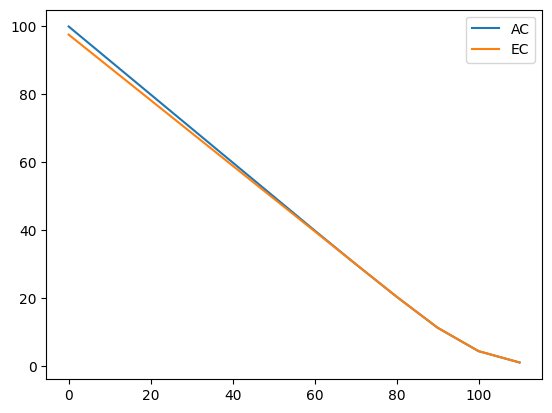

In [46]:
import matplotlib.pyplot as plt

plt.plot(100*np.arange(0,1.2,0.1), AC, label = "AC")
plt.plot(100*np.arange(0,1.2,0.1), EC, label = "EC")
plt.legend(loc="upper right", frameon = True);

In [171]:
#Sha
class TrinomialModel(object):
  def __init__(self, S0, r, sigma, T):
    self.__s0 = S0
    self.__r = r
    self.__sigma = sigma
    self.__T = T

  def __compute_probs(self, h):
    self.__pu = (
    (
        np.exp(self.__r * h /2) - np.exp(-self.__sigma * np.sqrt(h / 2))
    )
    /(
        np.exp(self.__sigma * np.sqrt(h / 2)) - np.exp(-self.__sigma * np.sqrt(h / 2))
    )
    ) **2

    self.__pd = (
        (
            -np.exp(self.__r *  h / 2) + np.exp(self.__sigma * np.sqrt(h / 2))
        )
        / (
            np.exp(self.__sigma * np.sqrt(h / 2)) - np.exp(-self.__sigma * np.sqrt(h / 2))
        )
    )**2

    self.__pm = 1 - self.__pu - self.__pd

  def __gen_stock_vec(self, nb, h):
    up = np.exp(self.__sigma * np.sqrt(2 * h))
    down = 1 / up
    vec_u = up * np.ones(nb)
    np.cumprod(vec_u, out = vec_u)
    vec_d = down * np.ones(nb)
    np.cumprod(vec_d, out = vec_d)
    res = np.concatenate((vec_d[::-1], [1.0], vec_u))
    res *= self.__s0
    return res

  def payoff(self, stock_vec, strike_price, option_type):
    if option_type == "call":
      return np.maximum(stock_vec - strike_price, 0.0)
    elif option_type == "put":
      return np.maximum(strike_price - stock_vec, 0.0)

  def compute_current_price(self, crt_vec_stock, nxt_vec_prices, strike_price, option_type, is_american):
    expectation = np.zeros(crt_vec_stock.size)
    for i in range(expectation.size):
      tmp = nxt_vec_prices[i] * self.__pd
      tmp += nxt_vec_prices[i+1] * self.__pm
      tmp += nxt_vec_prices[i+2] * self.__pu
      expectation[i] = tmp

    discounted_expectation = np.exp(-self.__r * self.__T / len(crt_vec_stock)) * expectation
    if is_american:
      exercise_value = self.payoff(crt_vec_stock, strike_price, option_type)
      return np.maximum(discounted_expectation, exercise_value)
    else:
      return discounted_expectation

  def price(self, nb_steps, strike_price, option_type, is_american):
    h = self.__T / nb_steps
    self.__compute_probs(h)
    final_vec_stock = self.__gen_stock_vec(nb_steps, h)
    final_payoff = self.payoff(final_vec_stock, strike_price, option_type)
    print(final_payoff)
    nxt_vec_prices = final_payoff
    for i in range(1, nb_steps + 1):
      vec_stock = self.__gen_stock_vec(nb_steps - i, h)
      # pass the american argument
      nxt_vec_prices = self.compute_current_price(vec_stock, nxt_vec_prices, strike_price, option_type, is_american)
    return nxt_vec_prices[0]

In [ ]:
K = [100*i for i in np.arange(0,1.2,0.1)]
AC = []
EC = []
for k in K:
    American_Call = TrinomialModel(S0=100.0, r=0.05, sigma=0.2, T=3/12).price(50, strike_price=k, option_type='call', is_american=True)
    European_Call = TrinomialModel(S0=100.0, r=0.05, sigma=0.2, T=3/12).price(50, strike_price=k, option_type='call', is_american=False)
    AC.append(American_Call)
    EC.append(European_Call)

# M4

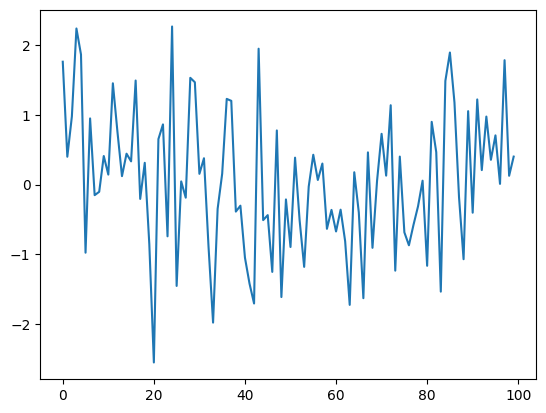

In [7]:
np.random.seed(0)
X = np.random.randn(100)
X.cumsum()

plt.plot(X);

If follows a Wiener process, , the change in for a small period follows a Normal distribution.  
$dS=S_0(\mu dt+\sigma dW_t)$

$R = \mu$  
$Vol = \sigma$  
$dW_t \sim N(0,dt)$

In [11]:
np.random.randn()

1.4340880588699174

In [3]:
S0 = 100
mu = 0
sigma = 1
N = 100000

def GBM(S0, mu, sigma, N):
    np.random.seed(0)
    X = np.random.randn(loc=mu, scale=sigma, sizes=N)

In [43]:
# Simulate the price by using Monte Carlo method

mu = 8.25/100
sigma = 42/100
T = 1.0
S0 = 125
N = 1
Ite = 1
M = 

dt = T/N

S = np.zeros((M+1, Ite))
# S = np.zeros(M+1)
S[0] = S0
for t in range(1, M+1):
    S[t] = S[t-1] * np.exp((r-0.5*sigma**2)*dt + \
                            sigma*np.sqrt(dt)*np.random.standard_normal(size=Ite))

np.random.seed(1)
ds = S0 * (mu * dt + sigma * np.sqrt(dt) * np.random.randn(M,N))
ds.shape

(1, 1)

In [45]:
x = np.random.normal(size=(500,255))
x.shape

(500, 255)

In [75]:
np.random.seed(1)
S = 100
mu = 0.1
sigma = 0.2
T = 1.0

E_S = S*np.exp(mu*T)
Var_S = S**2*np.exp(2*mu*T)*(np.exp(sigma**2*T) - 1)
E_S

110.51709180756477

In [63]:
np.exp(2*mu*1)*(np.exp(0.2**2)-1)*100

4.984639216123484

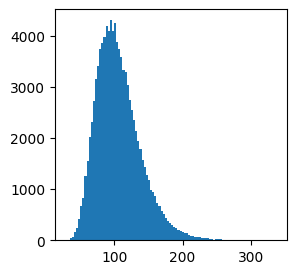

In [24]:
plt.figure(figsize=(3, 3))
plt.hist(S[-1], bins=100);

In [41]:
plt.figure(figsize=(6,3))
plt.plot(S[:,:6]);

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 600x300 with 0 Axes>

###  **Monte Carlo Simulation**

In [11]:
def bs_call_mc(S, K, r, sigma, T, t, opt, Ite):
    data = np.zeros((Ite, 2))
    z = np.random.normal(0, 1, [1, Ite])
    ST = S * np.exp((T-t) * (r - 0.5 * sigma**2) + sigma * np.sqrt(T-t) * z)
    
    if opt == "call":
        data[:, 1] = ST - K
        average = np.sum(np.amax(data, axis=1)) / float(Ite)
        callprice =  np.exp(-r * (T-t)) * average
        return callprice
        
    elif opt == "put":
        data[:, 1] = K - ST
        average = np.sum(np.amax(data, axis=1)) / float(Ite)
        putprice =  np.exp(-r * (T-t)) * average
        return putprice

opt = 'call' # 
K = 100 #
S = 100 # 
r = 0.05 #
T = 3/12 #
t = 0 #
sigma = 0.2 #
Ite = 50000 #

np.random.seed(42)
bs_call_mc(S, K, r, sigma, T, t, opt, Ite)

4.613011616985798

### **Black Scholes Model**

$C = S_0 N(d1) - Ke^{-rT} N(d2)$    
$P = Ke^{-rT} N(-d2) - S_0 N(-d1)$  

$d1 = \frac{ln(\frac{S_t}{S_0})+(\mu+\frac{\sigma^2}{2})T}{\sigma \sqrt{T}}$  
$d1 = \frac{ln(\frac{S_t}{S_0})+(\mu-\frac{\sigma^2}{2})T}{\sigma \sqrt{T}}$   

In [4]:
def bs_call_price(S, r, sigma, t, T, K, yield_rate, opttype='call'):
    ttm = T - t

    if ttm < 0:
        return 0.0
    elif ttm == 0.0:
        return np.maximum(S - K, 0.0)

    vol = sigma * np.sqrt(ttm)

    d_minus = np.log(S / K) + (r - yield_rate - 0.5 * sigma**2) * ttm
    d_minus /= vol

    d_plus = d_minus + vol

    if opttype == 'call':
        res = S * np.exp(-yield_rate * ttm) * norm.cdf(d_plus)
        res -= K * np.exp(-r * ttm) * norm.cdf(d_minus)
    elif opttype == 'put':
        res = -S * np.exp(-yield_rate * ttm) * norm.cdf(-d_plus)
        res += K * np.exp(-r * ttm) * norm.cdf(-d_minus)

    return res

In [138]:
p = bs_call_price(S=60, r=0.035, sigma=0.2, t=0, T=0.5, K=58, yield_rate=1.25/100, opttype='put')
c = bs_call_price(S=60, r=0.035, sigma=0.2, t=0, T=0.5, K=58, yield_rate=1.25/100, opttype='call')
c+58*np.exp(-0.035*0.5)==p+60*np.exp(-0.0125*0.5)

2.1366892115784495

In [193]:
S0 = 30.5
mu = 0.015
sigma = 0.45
t = 0
T = 3/12
K = 32
yield_rate = 0 # monte carlo chi dung khi y=0
opt = 'put'

Ite = 500_000

In [10]:
BSprice_n_Greeks(S0=S0, mu=mu, sigma=sigma, t=t, T=T, K=K, yield_rate=yield_rate, opt=opt)['price']

NameError: name 'BSprice_n_Greeks' is not defined

In [195]:
bs_call_mc(S=S0, K=K, r=mu, sigma=sigma, T=T, t=t, opt=opt, Ite=Ite)

3.532476858886696

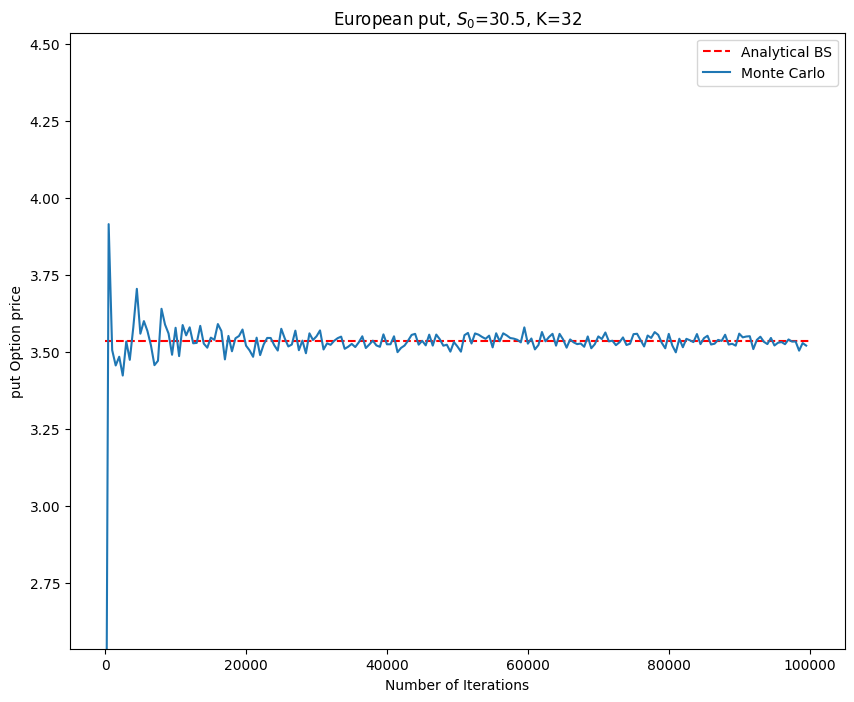

In [196]:
df = pd.DataFrame(columns=["Iter", "BSc"])

df = [{"Iter": Ite, "BSc": bs_call_mc(S=S0, K=K, r=mu, sigma=sigma, T=T, t=t, opt=opt, Ite=Ite)} \
      for Ite in range(1, 1_000_00, 500)]

df = pd.DataFrame(df)
plt.figure(figsize=(10, 8))

plt.hlines(
    BSprice_n_Greeks(S0=S0, mu=mu, sigma=sigma, t=t, T=T, K=K, yield_rate=yield_rate, opt=opt)['price'],
    xmin=0,
    xmax=1_000_00,
    linestyles="dashed",
    colors="red",
    label="Analytical BS"
)

plt.plot(df.set_index("Iter"), lw=1.5, label="Monte Carlo")

plt.title(f"European {opt}, $S_0$={S0}, K={K}")
plt.xlabel("Number of Iterations")
plt.ylabel(f"{opt} Option price")
plt.ylim(
    BSprice_n_Greeks(S0=S0, mu=mu, sigma=sigma, t=t, T=T, K=K, yield_rate=yield_rate, opt=opt)['price'] - 1,
    BSprice_n_Greeks(S0=S0, mu=mu, sigma=sigma, t=t, T=T, K=K, yield_rate=yield_rate, opt=opt)['price'] + 1
)
plt.legend();


### **Vasicek Model**

General form:  
$dr = m(r)dt + s(r)dz$  
$dr = k(\theta -r)dt + \sigma dz$  
where $dz = \sqrt{dt} z$ with $z \sim N(0,1)$  

In [7]:
def vasicek(r0, K, theta, sigma, T, N, M):
    dt = T/N
    rates = np.zeros((N, M))
    rates[0, :] = r0
    for j in range(M):
        for i in range(1, N):
            dr = (
                K * (theta - rates[i - 1, j]) * dt +
                sigma * np.sqrt(dt) * np.random.normal()
            )
            rates[i, j] = rates[i - 1, j] + dr
    return rates

M = 100
N = 100
T = 1.0
r0 = 0.01875
K = 0.2
theta = 0.01
sigma = 0.012
t = np.linspace(0, T, N)

rates = vasicek(r0, K, theta, sigma, T, N, M)

In [8]:
np.random.seed(42)

rates = vasicek(r0=2.85, K=0.2, theta=0.025, sigma=2.75, T=1, N=150, M=25)
rates[-1,:].mean()
# rates.mean()

3.228221094878978

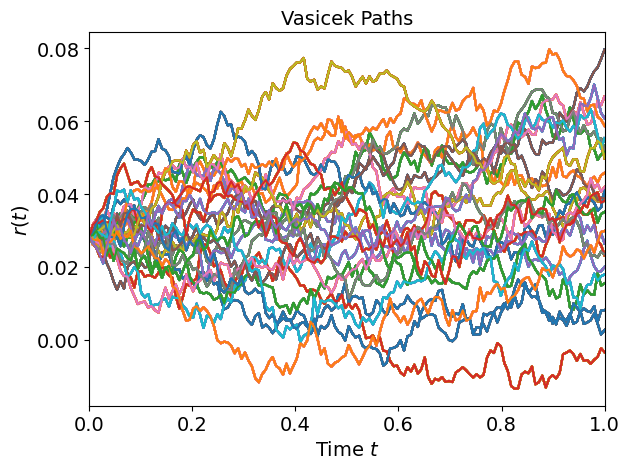

In [46]:
t = np.linspace(0, 1, 150)
for j in range(25):
    plt.plot(t, rates)

plt.xlabel("Time $t$", fontsize = 14)
plt.ylabel("$r(t)$", fontsize = 14)
plt.title("Vasicek Paths", fontsize = 14)
axes = plt.gca()
axes.set_xlim([0, T])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()
plt.show()

### **Greeks**

**Delta**  
Delta measures the **rate of change of the theoretical option value** with respect to changes in the underlying asset’s price.  
$\Delta = \frac{\partial V}{\partial S}$  
$\Delta_{call} = \Phi(d1) $  
$\Delta_{put} = -\Phi(-d1) $  

**Gamma**  
Gamma measures the **rate of change in the delta** with respect to changes in the underlying price.  
$\Gamma = \frac{\partial \Delta}{\partial S} = \frac{\partial^2 V}{\partial S^2}$  
$\Gamma = \frac{\phi'(d1)}{S\sigma\sqrt{T}}$  

**Vega**  
Vega measures **sensitivity to volatility**. Vega is the derivative of the option value with respect to the volatility of the underlying asset.  
$\upsilon = \frac{\partial V}{\partial \sigma}$  
$\upsilon = \frac{S\phi'(d1)}{\sqrt{T}}$

**Theta**  
Theta measures the sensitivity of the value of the derivative to the passage of time – time decay.  
$\Theta = -\frac{\partial V}{\partial \tau}$  
$\Theta_{call} = -\frac{S\phi'(d1)\sigma}{2T} - rKe^{(-rT)}\Phi(d2)$  
$\Theta_{put} = -\frac{S\phi'(d1)\sigma}{2T} + rKe^{(-rT)}\Phi(-d2)$  

**Rho**  
Rho measures the sensitivity to the interest rate.  
$\rho = \frac{\partial V}{\partial r}$  
$\rho_{call} = KTe^{(-rT)}\Phi(d2)$  
$\rho_{put} = -KTe^{(-rT)}\Phi(-d2)$  

In [5]:
def BSprice_n_Greeks(S0, K, mu, sigma, T, t, opt, yield_rate=0):
    dt = T - t
    vol = sigma * np.sqrt(dt)
    d1 = ( np.log(S0/K) + (mu - yield_rate + 0.5 * sigma**2) * (dt)) / vol
    d2 = d1 - sigma * np.sqrt(dt)

    if opt == 'call':
        price = S0 * np.exp(-yield_rate * dt) * norm.cdf(d1) - K * np.exp(-mu * dt) * norm.cdf(d2)
        delta = norm.cdf(d1)
        gamma = norm.pdf(d1) / (S0 * sigma * np.sqrt(dt))
        vega = S0 * norm.pdf(d1) * np.sqrt(dt) / 100
        eta = (-S0 * norm.cdf(-d1))/(K* np.exp(-mu*dt)*norm.cdf(-d2)-S0*norm.cdf(-d1)) # stock price
        theta = (-S0*norm.pdf(d1)*sigma/(2*np.sqrt(dt)) - mu*K*np.exp(-mu*dt)*norm.cdf(d2)) / 365
        rho = K*dt*np.exp(-mu*T)*norm.cdf(d2) / 100

    elif opt == 'put':
        price = K * np.exp(-mu * dt) * norm.cdf(-d2) - S0 * np.exp(-yield_rate * dt) * norm.cdf(-d1)
        delta = -norm.cdf(-d1)
        gamma = norm.pdf(d1) / (S0 * sigma * np.sqrt(dt))
        vega = S0 * norm.pdf(d1) * np.sqrt(dt) / 100
        eta = (-S0 * norm.cdf(-d1))/(K* np.exp(-mu*dt)*norm.cdf(-d2)-S0*norm.cdf(-d1)) # stock price
        theta = (-S0*norm.pdf(d1)*sigma/(2*np.sqrt(dt)) + mu*K*np.exp(-mu*dt)*norm.cdf(-d2)) /365
        rho = -K*dt*np.exp(-mu*dt)*norm.cdf(-d2) / 100

    return {"price": price, "delta": delta, "gamma": gamma, "vega": vega, "eta": eta, "theta": theta, "rho": rho}

In [10]:
opt = 'put'
K = 15
T = 1
t = 0
S0 = 12.5
sigma = 0.45
mu = 0.01

BSprice_n_Greeks(S0, K, mu, sigma, T, t, opt)

{'price': 3.7827324909512487,
 'delta': -0.5627466973133798,
 'gamma': 0.0700440116557032,
 'vega': 0.049249695695416304,
 'eta': -1.859590582533716,
 'theta': -0.0027395821673237863,
 'rho': -0.10817066207368496}

In [94]:
opt = 'put' #     
K = 122     #
T = 3/12  #
t = 0 #
S0 = 118.75 # 
sigma = 0.25 #   
mu = 0.015    #

BSprice_n_Greeks(S0, K, mu, sigma, T, t, opt)

{'price': 1.4358711443971508,
 'delta': 0.38114893630731683,
 'gamma': 0.0638298949263534,
 'vega': 0.05056524488697058,
 'eta': -5.186901727067387,
 'theta': -0.019002254116703934,
 'rho': 0.018252448809317742}

In [103]:
np.random.normal(size=(3,5)).shape

(3, 5)

In [13]:
opt = 'put' # 
K = 122 #
S = 118.75 # 
r = 0.015 #
T = 1.5 #
t = 0 #
sigma = 0.25 #
Ite = 3000 #

np.random.seed(42)
bs_call_mc(S, K, r, sigma, T, t, opt, Ite)

15.146839695824042

In [46]:
def vasicek(r0, K, theta, sigma, T, N, M):
    dt = T/N
    rates = np.zeros((N, M))
    rates[0, :] = r0
    for j in range(M):
        for i in range(1, N):
            dr = (
                K * (theta - rates[i - 1, j]) * dt +
                sigma * np.sqrt(dt) * np.random.normal()
            )
            rates[i, j] = rates[i - 1, j] + dr
    return rates
    
r0 = 2.85/100 # %
K = 0.15 
theta = .0255 
sigma = 0.85/100 # %
T = 5/12
N = 250 # steps
M = 25 # paths

np.random.seed(42)
x = vasicek(r0, K, theta, sigma, T, N, M)
x.max()*100

4.132014013344283

In [42]:
def vasicek(r0, K, theta, sigma, T, N, M):
    dt = T/N
    rates = np.zeros((N, M))
    rates[0, :] = r0
    for j in range(M):
        for i in range(1, N):
            dr = (
                K * (theta - rates[i - 1, j]) * dt +
                sigma * np.sqrt(dt) * np.random.normal()
            )
            rates[i, j] = rates[i - 1, j] + dr
    return rates

r0 = 0.985/100 # %
K = 0.22 
theta = .018
sigma = 1.75/100 # %
T = 6/12
N = 250 # steps
M = 1 # paths

np.random.seed(42)
x = vasicek(r0, K, theta, sigma, T, N, M)[-1][0]*100
print(f'interest rate: {x:.2f}')
x - 0.985 <= 1.1775 - x

interest rate: 1.04


True

In [17]:
#here se define function to simulate stock price
def simulate_stock_price(S0, r, sigma, T, I, N):
  dt = T / N
  S = np.zeros((N+1, I))
  S[0] = S0
  for t in range(1, N + 1):
    z = np.random.standard_normal(I) # Random sample for normal distribution
    S[t] = S[t-1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)
  return S

# Up-and-Out (UAO) barrier option
#here we define function to compute uao payoff
def calculate_uao_payoff(S, K, r, T, barrier):
  I = S.shape[1]
  payoff_put, payoff_call = np.zeros(I), np.zeros(I)
  for i in range(I):
    path = S[:, i]
    if np.any(path > barrier): #check if the path hits barrier
      payoff_put[i], payoff_call[i] = 0, 0 #option become worthless
    else:
      payoff_put[i] = max(K - path[-1], 0)#standard put option payoff
      payoff_call[i] = max(-K + path[-1], 0)
  return np.exp(-r * T)* payoff_put, np.exp(-r * T)* payoff_call

# Up-and-In barrier (UAI)
#here we define function to compute uai payoff
def calculate_uai_payoff(S, K, r, T, barrier):
  I = S.shape[1]
  payoff_put, payoff_call = np.zeros(I), np.zeros(I)
  for i in range(I):
    path = S[:, i]
    if np.any(path > barrier): #check if the path hits barrier
      payoff_put[i] = max(K - path[-1], 0)#standard put option payoff
      payoff_call[i] = max(-K + path[-1], 0)
    else:
      payoff_put[i], payoff_call[i] = 0, 0 #option remain inactive
  return np.exp(-r * T)* payoff_put, np.exp(-r * T)* payoff_call

In [21]:
S0 = 100
K = S0 # ATM
r = 0.05
sigma = 0.2
T = 3/12
barrier = 141
N = 1
Ite = 5000

S = simulate_stock_price(S0, r, sigma, T, Ite, N)
S[:, :5]

array([[100.        , 100.        , 100.        , 100.        ,
        100.        ],
       [116.09697417,  92.49193027, 119.09121319,  96.53051439,
         95.73846721]])

In [47]:
import pandas as pd
import numpy as np

df = pd.DataFrame([{'X': x, 'Y': x**3 - 6*x**2 + 3*x + 2 } for x in range(0,10,1)])
coef = np.round(np.polyfit(df.X, df.Y, deg=3),2)
np.polyval(coef, df.X) == df.Y

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: Y, dtype: bool

# M5

In [2]:
import vnstock as vns

In [3]:
df = pd.DataFrame()
for i in ['FPT', 'VCB', 'PNJ', 'POW', 'HDG']:
    stock = vns.stock_historical_data(i, start_date='2020-01-01')
    df = pd.concat([df, stock])
df = df.set_index('time')

In [4]:
df_close = df.pivot_table(index = df.index, columns = 'ticker')['close']
df_close.index = pd.DatetimeIndex(df_close.index)
df_close.head()

ticker,FPT,HDG,PNJ,POW,VCB
time,,,,,
2020-01-02,28950,12370,59950,11352,59070
2020-01-03,28460,12630,59550,11161,58480
2020-01-06,28160,12470,58850,10827,56920
2020-01-07,28700,12450,59610,10731,57110
2020-01-08,28060,12780,58380,10254,56590


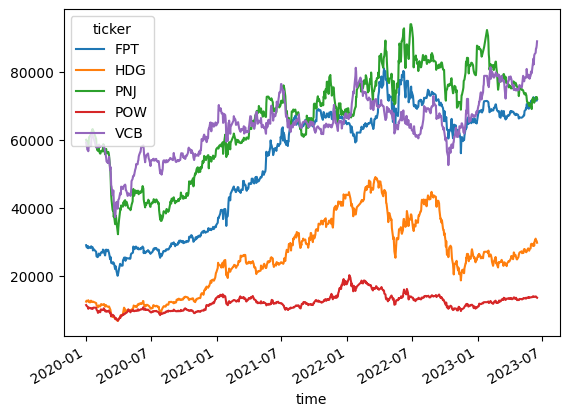

In [10]:
df_close.plot();

In [5]:
df_close['rFPT_simple'] = df_close['FPT'].pct_change()
df_close['rFPT_t0'] = df_close['FPT'] / df_close['FPT'].iloc[0] - 1
df_close['rFPT_log'] = np.log(df_close['FPT'] / df_close['FPT'].shift(1))

df_close['VCBr_simple'] = df_close['VCB'].pct_change()
df_close['rVCB_t0'] = df_close['VCB'] / df_close['VCB'].iloc[0] - 1
df_close['rVCB_log'] = np.log(df_close['VCB'] / df_close['VCB'].shift(1))

df_close = df_close.dropna()
df_close.head()

ticker,FPT,HDG,PNJ,POW,VCB,rFPT_simple,rFPT_t0,rFPT_log,VCBr_simple,rVCB_t0,rVCB_log
time,,,,,,,,,,,
2020-01-03,28460,12630,59550,11161,58480,-0.016926,-0.016926,-0.017071,-0.009988,-0.009988,-0.010038
2020-01-06,28160,12470,58850,10827,56920,-0.010541,-0.027288,-0.010597,-0.026676,-0.036397,-0.027038
2020-01-07,28700,12450,59610,10731,57110,0.019176,-0.008636,0.018995,0.003338,-0.033181,0.003332
2020-01-08,28060,12780,58380,10254,56590,-0.022300,-0.030743,-0.022552,-0.009105,-0.041984,-0.009147
2020-01-09,28460,12380,59120,10398,57700,0.014255,-0.016926,0.014155,0.019615,-0.023193,0.019425


/var/folders/z7/4mvzcpjd12d1c9zk1sn6bj0w0000gn/T/ipykernel_40140/1214199366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close['r_diff'] = (df_close['rFPT_simple'] - df_close['rFPT_log'])


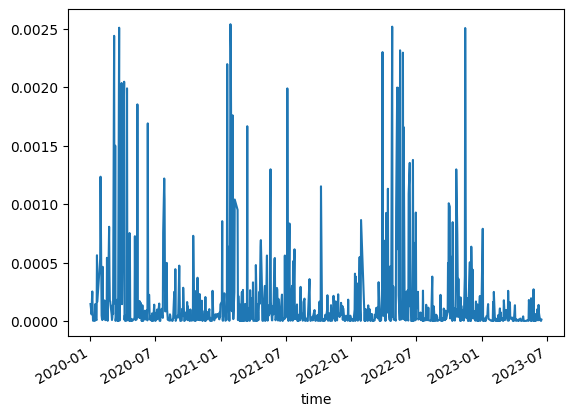

In [12]:
df_close['r_diff'] = (df_close['rFPT_simple'] - df_close['rFPT_log'])
# df_close[['rFPT_simple', 'rFPT_log']].plot()
df_close['r_diff'].plot();

In [13]:
df_close.index.year.value_counts()

time
2020    251
2021    250
2022    249
2023    111
Name: count, dtype: int64

In [14]:
np.product((df_close['rFPT_simple']+1))**(1/4) - 1

0.2548847637344631

$ \frac{1}{k} [\displaystyle\sum\limits_{j=1}^{k-1} \ln (1 + R_{t-j})] - 1$ 

In [12]:
# simple annualized return
simple_annualized_return = np.product((df_close['rFPT_simple']+1))**(1/4) - 1
# geo mean return
geo_mean_annualized_return = np.exp(np.log(df_close['rFPT_simple']+1).sum() / 4) - 1

In [16]:
volatility = df_close.iloc[:, :5].pct_change().dropna().std()
df_close_corr = df_close.iloc[:, :5].pct_change().dropna().corr()

df_close.rFPT_simple.skew()

-0.08711425695713132

In [301]:
A = np.array([[1.25, 0.367],[0.367, 0.45]])
np.linalg.cholesky(A)

array([[1.11803399, 0.        ],
       [0.32825478, 0.58502034]])

In [308]:
corr = np.array([[1, 0.679, 0.338], [0.679, 1, 0.435], [0.338, 0.435, 1]])
R = np.linalg.cholesky(corr)

np.random.seed(42)
random_array = np.random.standard_normal(corr.shape[0])

R@random_array

array([0.49671415, 0.23576379, 0.71117103])

In [38]:
random_array = np.random.standard_normal(num)
random_array @ R

array([ 1.41405172,  1.56638067, -1.17033816, -0.13897911, -0.12858133])

In [317]:
xA = 0.44
xB = -1.26
pB_A = 0.5
vol_A = 0.35
vol_B = 0.35
T = 12

vol_annulized = np.array([vol_A,vol_B])

vol_annulized[1]*(pB_A*xA + xB*np.sqrt(1-pB_A**2)) / np.sqrt(T) # monthly volatility asset B

-0.0880220146361994

In [318]:
tickers = ['AAPL', 'AMZN', 'TSLA']

df = yf.download(tickers, start='2021-01-01', end='2021-07-31')['Adj Close']
df_pct = df.pct_change()
vol = df.pct_change().std()
corr = df.pct_change().corr()

R, RT, stock_array = simulate_correlation_GBM(df_pct, vol, r = 0.01, S0=100.0, T=252)

corr
# R

[*********************100%%**********************]  3 of 3 completed


,AAPL,AMZN,TSLA
AAPL,1.000000,0.591437,0.531813
AMZN,0.591437,1.000000,0.418275
TSLA,0.531813,0.418275,1.000000


In [268]:
def simulate_correlation_GBM(df_pct, vol, r=0.001, S0=100.0, T=252):
    
    num = len(vol)
    dt = 1/T
    stock_array = np.full((num, T), fill_value=S0)
    vol = vol * np.sqrt(T)
    corr = df_pct.corr()

    R = np.linalg.cholesky(corr)
    RT = R.T.conj()
    
    for t in range(1, T):
        random_array = np.random.standard_normal(num)
        epsilon_array = random_array@R          

        for i in range(num):
            stock_array[i, t] = stock_array[i, t-1] * np.exp ((r - 0.5*vol.iloc[i]**2)*dt + vol.iloc[i]*np.sqrt(dt)*epsilon_array[i])

    return R, RT, stock_array

In [269]:
tickers = ['AAPL', 'AMZN', 'META', 'GOOG', 'MSFT']

df = yf.download(tickers, start='2013-11-08', period='10y')['Adj Close']
df_pct = df.pct_change()
vol = df.pct_change().std()
corr = df.pct_change().corr()
corr

R, RT, stock_array = simulate_correlation_GBM(df_pct, vol, r = 0.01, S0=100.0, T=252)

[*********************100%%**********************]  5 of 5 completed


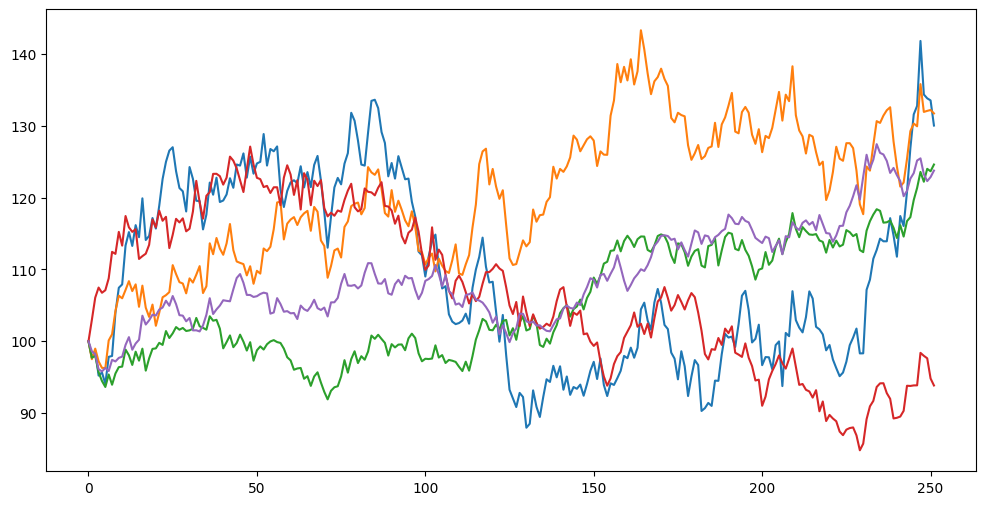

In [270]:
fig, ax = plt.subplots(1, 1, figsize = (12,6))
t = [t for t in range(T)]
for i in range(num):
    ax.plot(t, stock_array[i]);

In [ ]:
xA = 0.44
xB = -1.26

p = 0.5
vol = 0.35

In [60]:
tsla = yf.download(tickers='TSLA', start='2021-01-01', end='2021-12-31')

[*********************100%***********************]  1 of 1 completed


In [70]:
# tsla['Adj Close'].shift(1)
np.log(tsla['Adj Close'] / tsla['Adj Close'].shift(1)).min()

-0.12772318728902374

In [104]:
x = np.array([[1.25, 0.367],[0.367, 0.45]])
np.linalg.cholesky(x)

array([[1.11803399, 0.        ],
       [0.32825478, 0.58502034]])

17, 14

In [343]:
import yfinance as yf

def return_df(tickers, start, end, type_return):
    df = yf.download(tickers, start, end)
    df = df['Adj Close']
    print(f"ticker: {tickers}, startdate: {df.index[0].date()}, enddate: {df.index[-1].date()}")

    # simple compounding return
    if type_return == 'simple':
        df = df.pct_change().dropna()
        vol = df.std()
        mean = df.mean()
        r= np.prod(df+1)
        return df, r, mean, vol
    # continuous compounding return
    elif type_return == 'continuous':
        df = np.log(df / df.shift(1)).dropna()
        vol = df.std()
        mean = df.mean()
        r= np.sum(df)
        return df, r, mean, vol

In [371]:
tickers = ['TSLA']
start = '2021-01-01'
end = '2021-12-31'
type_return = 'simple'

df, r, mean, vol = return_df(tickers, start, end, type_return)
df.min()

[*********************100%%**********************]  1 of 1 completed
ticker: ['TSLA'], startdate: 2021-01-04, enddate: 2021-12-30


-0.11990303254359846

In [368]:
tickers = ['TSLA']
start = '2021-01-01'
end = '2021-07-30'

df = yf.download(tickers, start, end='2021-07-30')
r1 = np.log(df['Adj Close'].iloc[-1] / df['Adj Close'].iloc[0])

df = yf.download(tickers, start, end='2021-07-31')
r2 = np.log(df['Adj Close'].iloc[-1] / df['Adj Close'].iloc[0])

print((r1+1)*10000)
print((r2+1)*10000)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
9254.587357054932
9398.95944369876


# M6

### **Implied Vol Smile**

In [55]:
Mat = date(2023,12,29)
T = Mat - date.today()
ticker = 'TSLA'

print(T)

chain = options.get_options_chain(ticker, date=Mat)
options_mats = options.get_expiration_dates(ticker)

print(options_mats[::-1])

price = si.get_live_price(ticker)
print(price)

callData = chain['calls']
putData = chain['puts']

print(callData.shape)
callData[(callData.Strike >= price*0.5) & (callData.Strike <= price*1.5)].loc[:5]

36 days, 0:00:00
['January 16, 2026', 'December 19, 2025', 'September 19, 2025', 'June 20, 2025', 'January 17, 2025', 'September 20, 2024', 'June 21, 2024', 'May 17, 2024', 'April 19, 2024', 'March 15, 2024', 'February 16, 2024', 'January 19, 2024', 'December 29, 2023', 'December 22, 2023', 'December 15, 2023', 'December 8, 2023', 'December 1, 2023', 'November 24, 2023']
234.2100067138672
(63, 11)


,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
2,TSLA231229C00120000,2023-11-15 1:17PM EST,120.0,121.30,114.20,116.00,0.00,-,-,4,116.94%
3,TSLA231229C00125000,2023-11-14 11:44AM EST,125.0,112.00,109.20,111.05,0.00,-,-,2,111.23%
4,TSLA231229C00135000,2023-11-15 11:32AM EST,135.0,111.25,99.30,101.10,0.00,-,1,5,100.73%
5,TSLA231229C00140000,2023-11-20 10:09AM EST,140.0,102.49,94.35,96.15,7.69,+8.11%,1,3,95.90%


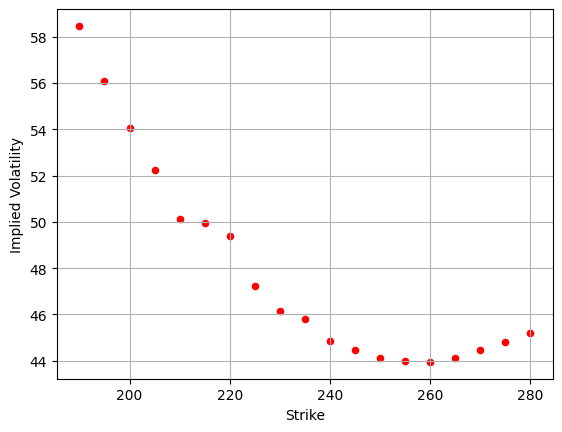

In [56]:
import matplotlib.pyplot as plt

df_call = callData 
df_call['Implied Volatility'] = df_call['Implied Volatility'].str[:-1]
df_call['Implied Volatility'] = df_call['Implied Volatility'].astype(float)
df_call = df_call[df_call['Implied Volatility']>0]
df_call = df_call[
    (df_call['Strike'] > price*0.8) & (df_call['Strike'] < price*1.2)
]
# print(df_call)
df_call.plot(kind='scatter', x='Strike', y='Implied Volatility', color='red')
plt.grid();

In [5]:
# Newton-Raphson method
N_prime = norm.pdf
N = norm.cdf

In [4]:
def black_scholes_call(S, K, T, r, sigma):
    # BS formula
    d1 = (np.log(S/K) + (r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    call = S * N(d1) - K * N(d2) * np.exp(-r*T)
    return call

def vega(S, K, T, r, sigma):
    #Vega formula
    d1 = (np.log(S/K) + (r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    vega = S * np.sqrt(T) * N_prime(d1)
    return vega

def implied_volatility(C, S, K, T, r, tol=0.0001, max_iter=100):
    # Implied volatility
    sigma = 0.3

    for i in range(max_iter):
        diff = black_scholes_call(S, K, T, r, sigma) - C
        print(f'diff: {diff}')
        if abs(diff) < tol:
            print(f'found on {i}th iteration')
            print(f'difference is equal to {diff}')
            break
        x = vega(S, K, T, r, sigma)
        print(f'x: {x}')
        sigma = sigma - diff/vega(S, K, T, r, sigma) 

    return sigma



In [6]:
obs_price = 20
S = 100
K = 150
T = 1
r = 0.05

im_vol = implied_volatility(obs_price, S, K, T, r)
print('Implied volatility Newton Raphson: ', im_vol)

diff: -17.942014320091268
x: 23.35332852127305
diff: 10.442262926095996
x: 39.0932922711001
diff: -0.1499530175178556
x: 39.8572023265642
diff: 1.2398004063385315e-05
found on 3th iteration
difference is equal to 1.2398004063385315e-05
Implied volatility Newton Raphson:  0.8049359839108189


### **Dupier**

In [7]:
ticker = "IBM"
options_mats = options.get_expiration_dates(ticker)
price = si.get_live_price(ticker)
print(options_mats, price, sep='\n')

['November 24, 2023', 'December 1, 2023', 'December 8, 2023', 'December 15, 2023', 'December 22, 2023', 'December 29, 2023', 'January 19, 2024', 'February 16, 2024', 'April 19, 2024', 'June 21, 2024', 'July 19, 2024', 'September 20, 2024', 'January 17, 2025', 'January 16, 2026']
155.1300048828125


In [34]:
temp_Data = pd.DataFrame()
callData = pd.DataFrame()

for time in options_mats:
    chain = options.get_options_chain(ticker, time)
    chain_df = chain['calls']
    date_time_obj = datetime.strptime(time, "%B %d, %Y")
    Td = date_time_obj - datetime.today()

    for row in range(len(chain_df.index)):
        values_to_add = pd.DataFrame([{"Matdays": Td.days, "Maturity": date_time_obj}])
        values_to_add_call = pd.DataFrame(
            [
                {
                    "Strike": chain_df['Strike'].loc[row],
                    "Implied Vol": chain_df["Implied Volatility"].loc[row],
                    "Price": chain_df["Last Price"].loc[row]
                }
            ]
        )
        temp_Data = pd.concat([temp_Data, values_to_add])
        callData = pd.concat([callData, values_to_add_call])

callData = pd.concat([callData, temp_Data], axis=1)
callData.head()

,Strike,Implied Vol,Price,Matdays,Maturity
0,95.0,312.11%,52.90,0,2023-11-24
0,115.0,202.34%,31.25,0,2023-11-24
0,129.0,133.59%,19.40,0,2023-11-24
0,130.0,128.91%,23.90,0,2023-11-24
0,132.0,119.53%,15.75,0,2023-11-24


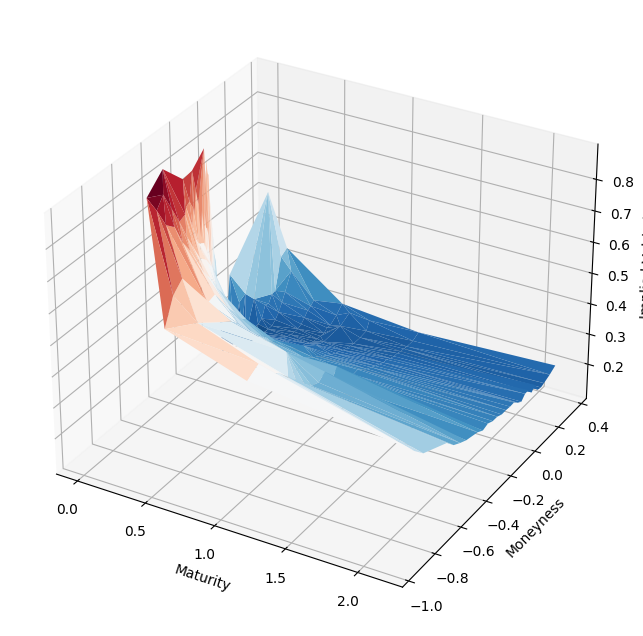

In [45]:
callData['Implied Vol'] = callData['Implied Vol'].str[:-1]
callData['Implied Vol'] = callData['Implied Vol'].astype(float)

callData = callData[callData['Implied Vol'] < 90]
callData = callData[callData['Implied Vol'] > 0]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(
    callData["Matdays"] / 365,
    np.log(callData["Strike"]/price),
    callData["Implied Vol"]/100,
    cmap = plt.cm.RdBu_r,
    linewidth = 0
)

ax.set_xlabel('Maturity')
ax.set_ylabel('Moneyness')
ax.set_zlabel('Implied Vol (%)');

In [46]:
new_df = callData[
    callData["Strike"] == 180
]
new_df.head()

,Strike,Implied Vol,Price,Matdays,Maturity
0,180.0,24.12,0.14,35,2023-12-29
0,180.0,18.21,0.05,56,2024-01-19
0,180.0,16.75,0.19,84,2024-02-16
0,180.0,16.93,0.61,147,2024-04-19
0,180.0,16.85,1.35,210,2024-06-21


### **CEV**

In [8]:
Mat = date(2024, 4, 19)
T = Mat - date.today()
ticker = 'IBM'
chain = options.get_options_chain(ticker, Mat)

callData = chain['calls']
callData.head()

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,IBM240419C00075000,2023-10-31 11:42AM EST,75.0,68.60,79.45,81.85,0.00,-,1,0,61.33%
1,IBM240419C00080000,2023-10-31 11:42AM EST,80.0,63.60,74.55,77.75,0.00,-,1,0,64.28%
2,IBM240419C00095000,2023-11-07 2:52PM EST,95.0,53.92,59.95,62.45,0.00,-,-,0,50.29%
3,IBM240419C00100000,2023-11-22 1:45PM EST,100.0,56.65,55.35,56.80,7.15,+14.44%,1,4,51.10%
4,IBM240419C00110000,2023-11-02 2:43PM EST,110.0,37.27,45.50,46.95,0.00,-,5,10,43.12%


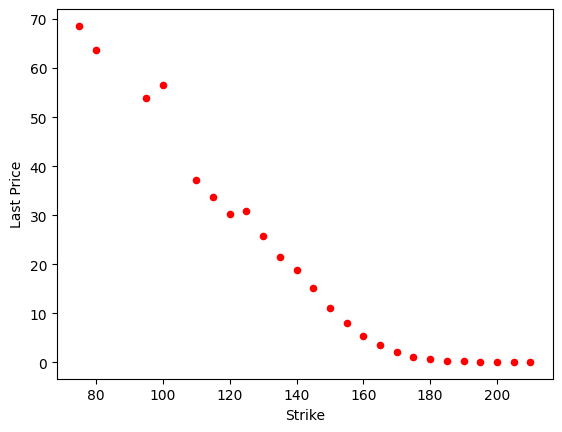

In [9]:
df_call = callData

df_call["Implied Volatility"] = df_call["Implied Volatility"].str[:-1]
df_call["Implied Volatility"] = df_call["Implied Volatility"].astype(float)

df_call.plot(kind='scatter', x='Strike', y='Last Price', color='red');

Mean Squared Error is  28.34565289112743


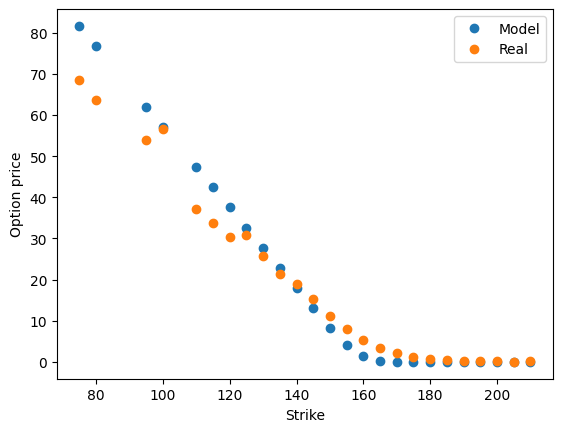

In [10]:
# CEV with known parameters
ticker = 'IBM'
S0 = si.get_live_price(ticker)
r = 0.05
Td = T.days / 365

sigma = 0.35
beta = 1.25

def C(t, K, sigma, beta):
    zb = 2 + 2 / (2-beta)
    kappa = 2 * r / (sigma**2 * (2-beta) * (np.exp(r* (2-beta) * t) - 1))
    x = kappa * S0 ** (2-beta)  * np.exp(r* (2-beta) * t)
    y = kappa * K ** (2-beta)
    return S0 * (1-ncx2.cdf(2*y, zb, 2*x)) - K * np.exp(-r * t) * (ncx2.cdf(2*x, zb - 2, 2*y))

test_strikes = df_call["Strike"]
modelprices = C(Td, test_strikes, sigma, beta)
realprices = df_call["Last Price"]
plt.plot(test_strikes, modelprices, "o", label="Model")
plt.plot(test_strikes, realprices, "o", label="Real")
plt.xlabel("Strike")
plt.ylabel("Option price")
plt.legend()
err = mean_squared_error(modelprices.values, realprices)
print("Mean Squared Error is ", err)

### **Calibration**

In [12]:
def error(params):
    sigma = params[0]
    beta = params[1]
    modelprices = C(Td, test_strikes, sigma, beta)
    realprices = df_call["Last Price"]

    return mean_squared_error(modelprices, realprices)

bnds = ((0, None), (1, None))
res = minimize(
    error, [0.65, 1.8], bounds=bnds
)

print("Optimization process results:")
print(res)

Optimization process results:
  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 29.255920556279733
        x: [ 1.941e-02  1.024e+00]
      nit: 1
      jac: [ 0.000e+00  0.000e+00]
     nfev: 6
     njev: 2
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


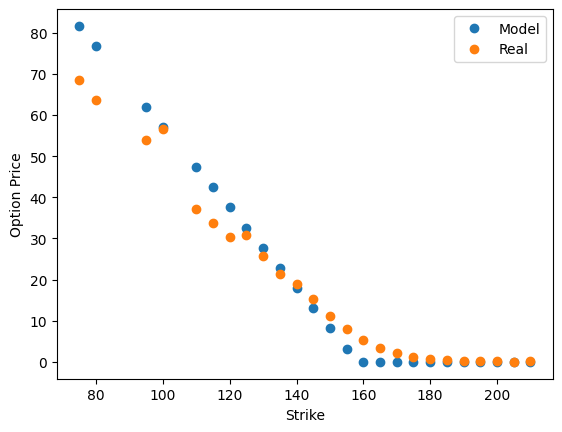

In [13]:
modelprices = C(Td, test_strikes, res.x[0], res.x[1])
realprices = df_call['Last Price']
plt.plot(test_strikes, modelprices, "o", label = "Model")
plt.plot(test_strikes, realprices, "o", label = "Real")
plt.xlabel("Strike")
plt.ylabel("Option Price")
plt.legend();